# Data Quality Check and Exploratory Data Analysis for Sales Dataset

The datasets are provided by a bike manufacturing company for data quality assessment and the company is also interested in leveraging the power of data visualization to understand their customer's purchase pattern in order to make better business strategies.

# Importing datasets 

In [52]:
import os 
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Storing dataframes in dictionary "data"
data ={}
files = os.listdir(r"C:\Users\Dell\Desktop\Company_Data")

for file in files:
    filename = re.sub(".csv", "", file) 
    dataframe = pd.read_csv(r"C:\Users\Dell\Desktop\Company_Data\%s" %file) 
    data.update({filename: dataframe})
    
data.keys()

dict_keys(['address', 'customerslist', 'demographics', 'transactions'])

In [53]:
# Demographics dataset
data['address'].head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
# Address Dataset
data['demographics'].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,12-10-1953,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,03-10-1961,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,13-05-1977,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [55]:
# Transactions Dataset
data['transactions'].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-2012
1,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-2014
2,3,37,402,16-10-2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-1999
3,4,88,3135,31-08-2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16-12-1998
4,5,78,787,01-10-2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10-08-2015


In [56]:
# Customers List dataset: Test Dataset
data['customerslist'].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,12-07-1957,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.51,0.6375,0.796875,0.677344,1,1,1.718750
1,Morly,Genery,Male,69,22-03-1970,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.97,0.9700,1.212500,1.030625,1,1,1.718750
2,Ardelis,Forrester,Female,10,28-08-1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.10,1.1000,1.100000,1.100000,1,1,1.718750
3,Lucine,Stutt,Female,64,28-01-1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.40,0.5000,0.500000,0.500000,4,4,1.703125
4,Melinda,Hadlee,Female,34,21-09-1965,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.85,0.8500,1.062500,1.062500,4,4,1.703125


# I. Checking Data Quality 

# Anomalies in Datetime features 

In [57]:
# Converting type 'object' to datetime format

data['demographics']['DOB'] = pd.to_datetime(data['demographics']['DOB'], infer_datetime_format=True)
data['transactions']['transaction_date'] = pd.to_datetime(data['transactions']['transaction_date'], infer_datetime_format=True)
data['transactions']['product_first_sold_date'] = pd.to_datetime(data['transactions']['product_first_sold_date'], infer_datetime_format=True)
data['customerslist']['DOB'] = pd.to_datetime(data['customerslist']['DOB'], infer_datetime_format=True)

In [58]:
# Anomalies in features with Dates
def check_date(datetime_feature, dataset):
    
    dataframe = datetime_feature
    min_year = dataframe.min().year
    difference = 2020 - min_year
    
    print("\n| %s |" %dataset.upper())
    if dataframe.name=='DOB' and difference > 100:
        print("\nAnomaly found: Minimum year for feature '{}' is {} equivalent to {} years".format(dataframe.name, min_year, difference))
    else:
        print("\nNo Anomaly found in feature '{}'".format(dataframe.name))

In [59]:
# Passing parameters to the check_date function
check_date(data['demographics']['DOB'], 'demographics')
check_date(data['transactions']['transaction_date'], 'transactions')
check_date(data['transactions']['product_first_sold_date'], 'transactions')
check_date(data['customerslist']['DOB'], 'customerslist')


| DEMOGRAPHICS |

Anomaly found: Minimum year for feature 'DOB' is 1843 equivalent to 177 years

| TRANSACTIONS |

No Anomaly found in feature 'transaction_date'

| TRANSACTIONS |

No Anomaly found in feature 'product_first_sold_date'

| CUSTOMERSLIST |

No Anomaly found in feature 'DOB'


# Missing values

In [60]:
# Number of missing values
def Missing_values(dataframe):
    
    # Number of missing values
    missing = []
    # Features with missing values
    features = []
    # Calculate % of missing values
    miss_perc = []
    
    for feature, miss_val in dataframe.isnull().sum().items():
        if miss_val>0:
            features.append(feature)
            missing.append(miss_val)
            miss_perc.append(miss_val*100/dataframe.shape[0])
            
    # Creating a dataframe
    miss_df = pd.DataFrame({'Missing Values': missing, 'In %': miss_perc}, index = features)
            
    if len(miss_df)==0:
        return "The dataset is complete"
    else:
        return miss_df

In [61]:
# Transactions dataset
Missing_values(data['transactions'])

,Missing Values,In %
online_order,360,1.800
brand,197,0.985
product_line,197,0.985
product_class,197,0.985
product_size,197,0.985
standard_cost,197,0.985
product_first_sold_date,197,0.985


In [62]:
# Demographics Dataset
Missing_values(data['demographics'])

,Missing Values,In %
last_name,125,3.125
DOB,87,2.175
job_title,506,12.650
job_industry_category,656,16.400
tenure,87,2.175


In [63]:
# Customers list Dataset
Missing_values(data['customerslist'])

,Missing Values,In %
last_name,29,2.9
DOB,17,1.7
job_title,106,10.6
job_industry_category,165,16.5


In [64]:
# Address Dataset
Missing_values(data['address'])

'The dataset is complete'

# Inconsistencies 

In [65]:
pd.DataFrame(data['customerslist'].dropna().nunique(), columns=['Unique Values'])

,Unique Values
first_name,682
last_name,709
gender,2
past_3_years_bike_related_purchases,99
DOB,702
job_title,176
job_industry_category,9
wealth_segment,3
deceased_indicator,1
owns_car,2


In [66]:
pd.DataFrame(data['demographics'].dropna().nunique(), columns=['Unique Values'])

,Unique Values
customer_id,2780
first_name,2336
last_name,2707
gender,5
past_3_years_bike_related_purchases,100
DOB,2538
job_title,195
job_industry_category,9
wealth_segment,3
deceased_indicator,2


In [67]:
pd.DataFrame(data['transactions'].dropna().nunique(), columns=['Unique Values'])

,Unique Values
transaction_id,19445
product_id,101
customer_id,3492
transaction_date,364
online_order,2
order_status,2
brand,6
product_line,4
product_class,3
product_size,3


In [68]:
pd.DataFrame(data['address'].nunique(), columns=['Unique Values'])

,Unique Values
customer_id,3999
address,3996
postcode,873
state,5
country,1
property_valuation,12


Inconsistencies found in the datasets:

* The number of unique 'customer_id' is different for these datasets.
* In transactions dataset, standard_cost has continuous values but it is shown as an 'object' type because it has a $ sign in front of each of its values.
* In demographics dataset, Gender has 6 unique values but it must be only 2 i.e Male and Female for this problem. In customerslist, we have 3 unique gender values.  
* job_title for customerslist dataset has 177 unique values whereas demographics dataset has 195.
* In address dataset, we can see 5 Australian states but we must only have 3 unique states in the context of this project. This is due to the fact that there are states with inconsistent names i.e. one state being represented by different names.

# II. Data Cleaning

In [69]:
# Removing '$' sign from standard_cost
data['transactions']['standard_cost'] = data['transactions']['standard_cost'].str.replace("[$,]", "").astype(float)

# New variable margin using list_price and standard_cost
def create_margin(columns):
    
    list = columns[0]
    standard = columns[1]
    
    # Calculating Margin
    difference = list - standard
    
    if difference <= 500:
    # Margin less than 500        
        return 'Low'
    
    elif difference <= 1000:
    #Margin between 500 and 1000        
        return 'Medium'

    else:
    # Margin of  more than 1000        
        return 'High'        
    
# New categorical feature 
data['transactions']['margin'] = data['transactions'][['list_price', 'standard_cost']].apply(create_margin, axis=1)

In [70]:
# We have ~1% missing values in the dataset
# We can drop the rows with null values
data_trans_original = data['transactions'] 
data['transactions'] = data['transactions'].dropna() 

# Loss in data after dropping 'nan' values
DataLost = 1 - len(data['transactions'])/len(data_trans_original)

print("\nTransactions Dataset: \n\nFraction of data lost after dropping rows with 'nan' values : %.3f\n" %DataLost)


Transactions Dataset: 

Fraction of data lost after dropping rows with 'nan' values : 0.028



In [71]:
# Hot deck Imputation of 'job_industry_category' using 'job_title'

def impute_category(columns):
    
    title = columns[0]
    category = columns[1]
    
    if pd.isnull(category) and pd.notnull(title):
        
        # Return mode of 'job_industry_category' based on the corresponding value of 'job_title' 
        Impute_with_title = dataframe['job_industry_category'][dataframe['job_title'] == title].mode(dropna = True)
        
        if len(Impute_with_title) == 0:
            return dataframe['job_industry_category'].mode(dropna = True)[0]
        else:
            return Impute_with_title[0]
    
    elif pd.isnull(category) and pd.isnull(title):
        
        # Return mode of only 'job_industry_category' column when 'job_title' is null 
        Impute_without_title = dataframe['job_industry_category'].mode(dropna = True)
        
        if len(Impute_without_title) == 0:
            return dataframe['job_industry_category'].mode(dropna = True)[0]
        else:
            return Impute_without_title[0]        
    
    else:
        # Return the original value if null doesn't exist
        return category

In [72]:
# Defining dataset to be cleaned 
dataframe = data['demographics']
# Imputing missing values of 'job_industry_category' in demographics
dataframe['job_industry_category'] = dataframe[['job_title', 'job_industry_category']].apply(impute_category, axis = 1)

# Defining dataset to be cleaned 
dataframe = data['customerslist']
# Imputing missing values of 'job_industry_category' in demographics
dataframe['job_industry_category'] = dataframe[['job_title', 'job_industry_category']].apply(impute_category, axis = 1)

In [73]:
# Imputing 'tenure' with its median value
data['demographics']['tenure'].fillna(data['demographics']['tenure'].median(), inplace=True)

In [74]:
# Create a new feature 'Age' from 'DOB' 

def create_age(customer_dob):
    
    if pd.notnull(customer_dob) and customer_dob.year >= 1920:
        
        # Calculating Age
        age = 2020 - customer_dob.year
        return age
    
    else:
        return np.nan
        
# demographics: Imputing 'nan' with median age     
data['demographics']['Age'] = data['demographics']['DOB'].apply(create_age)
data['demographics']['Age'].fillna(data['demographics']['Age'].median(), inplace=True)

# customerslist: Imputing 'nan' with median age 
data['customerslist']['Age'] = data['customerslist']['DOB'].apply(create_age)
data['customerslist']['Age'].fillna(data['customerslist']['Age'].median(), inplace=True)

In [75]:
# Function for removing/replacing inconsistent values

def inconsistency_gender(gender):
    
    if gender in ['F', 'Femal', 'Female']:
        return 'Female'
    
    elif gender in ['M', 'Male']:
        return 'Male'
    
    else:
        return 'Male'
    
def inconsistency_state(state):
    
    if state in ['New South Wales', 'NSW']:
        return 'NSW'
    
    elif state in ['VIC', 'Victoria']:
        return 'VIC'
    
    else:
        return 'QLD'

# Updating the datasets
data['demographics']['gender'] = data['demographics']['gender'].apply(inconsistency_gender)
data['customerslist']['gender'] = data['customerslist']['gender'].apply(inconsistency_gender)
data['address']['state'] = data['address']['state'].apply(inconsistency_state)

In [76]:
# Missing values in the dataset
Missing_values(data['demographics'])

,Missing Values,In %
last_name,125,3.125
DOB,87,2.175
job_title,506,12.650


In [77]:
# Missing values in the dataset
Missing_values(data['customerslist'])

,Missing Values,In %
last_name,29,2.9
DOB,17,1.7
job_title,106,10.6


* For Demographics and Customers_list, We can drop these remaining features as 'last_name' and 'DOB' are not useful for modeling and 'job_title' has 195 unique values which would imply creating 194(n-1) dummy variables.

In [78]:
data['demographics'].to_csv(r'C:\Users\Dell\Desktop\Demo', index = False)
data['customerslist'].to_csv(r'C:\Users\Dell\Desktop\Cust', index = False)
data['transactions'].to_csv(r'C:\Users\Dell\Desktop\Trans', index = False)
data['address'].to_csv(r'C:\Users\Dell\Desktop\Add', index = False)

# III. Exploratory Data Analysis

# Qualitative Analysis

In [79]:
# Quantitative features in the dataset
# Features not required for EDA

Feature_skip = ['first_name', 'last_name', 'transaction_id', 'product_id' ,'customer_id', 'address', 'country', 'deceased_indicator', 'postcode', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']

# Qualitative features in the dataset

def categorical(df_name):
    
    # Initialize a list to store categorical features
    cat_features = []
    
    for col in data[df_name]:
        
        # Object type features or numerical features with unique values less than 10
        if data[df_name].dtypes[col] == 'object' or len(data[df_name][col].unique()) <= 10:
            cat_features.append(col)     
            
    return cat_features

# Creating separate lists for categorical variables
# It is important to remove unnecessary features from the lists

trans_cat = [col for col in categorical('transactions') if col not in Feature_skip]
demo_cat = [col for col in categorical('demographics') if col not in Feature_skip]
add_cat = [col for col in categorical('address') if col not in Feature_skip]
cust_cat = [col for col in categorical('customerslist') if col not in Feature_skip]  

# Pie Chart

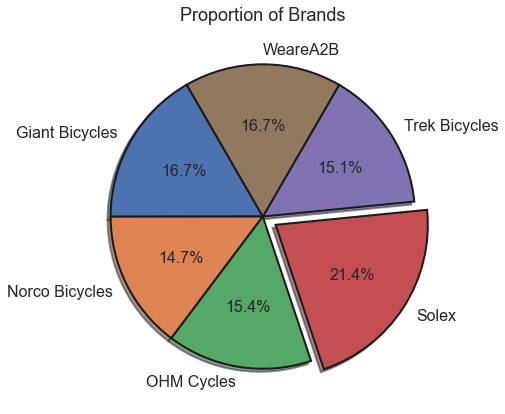

,Count
brand,
Giant Bicycles,3244
Norco Bicycles,2863
OHM Cycles,2993
Solex,4169
Trek Bicycles,2931
WeareA2B,3245


In [80]:
plt.figure(figsize=(10, 7))
plt.title('Proportion of Brands', fontsize=18)

wedgeprops={'edgecolor':'k', 
            'linewidth': 2, 
            'antialiased': True}

data['transactions'].groupby(['brand']).size().plot.pie(explode=[0,0,0,0.1,0,0], autopct='%1.1f%%', shadow=True, 
                                                        startangle=120, label='', fontsize=16, wedgeprops=wedgeprops)
plt.show()

pd.DataFrame(data['transactions'].groupby(['brand']).size(), columns=['Count'])

# Multiple Bar Plots

In [81]:
def bar_plot(df, features, rows, cols, df_name=None):
    
    if df_name != 'Address':
        fig = plt.figure(figsize=(25, 25))
    
    else:
        fig = plt.figure(figsize=(7, 5))
        
    for index, feature in enumerate(features):
        
            ax = fig.add_subplot(rows, cols, index+1)
            sns.set_style('darkgrid')
            sns.countplot(df[feature], edgecolor='k', lw=2, palette='gist_rainbow', ax=ax)
            ax.set_title(("Bar Plot of "+re.sub('_', ' ', feature)).upper(), fontsize=25, fontweight='bold')
            ax.set_xlabel(re.sub('_', ' ', feature).capitalize(), fontsize=25)         
            ax.set_ylabel('Count', fontsize=25)                 
            plt.yticks(fontsize=23)    
            plt.xticks(fontsize=23, rotation=90, horizontalalignment='center')
                
    plt.tight_layout()
    plt.show()

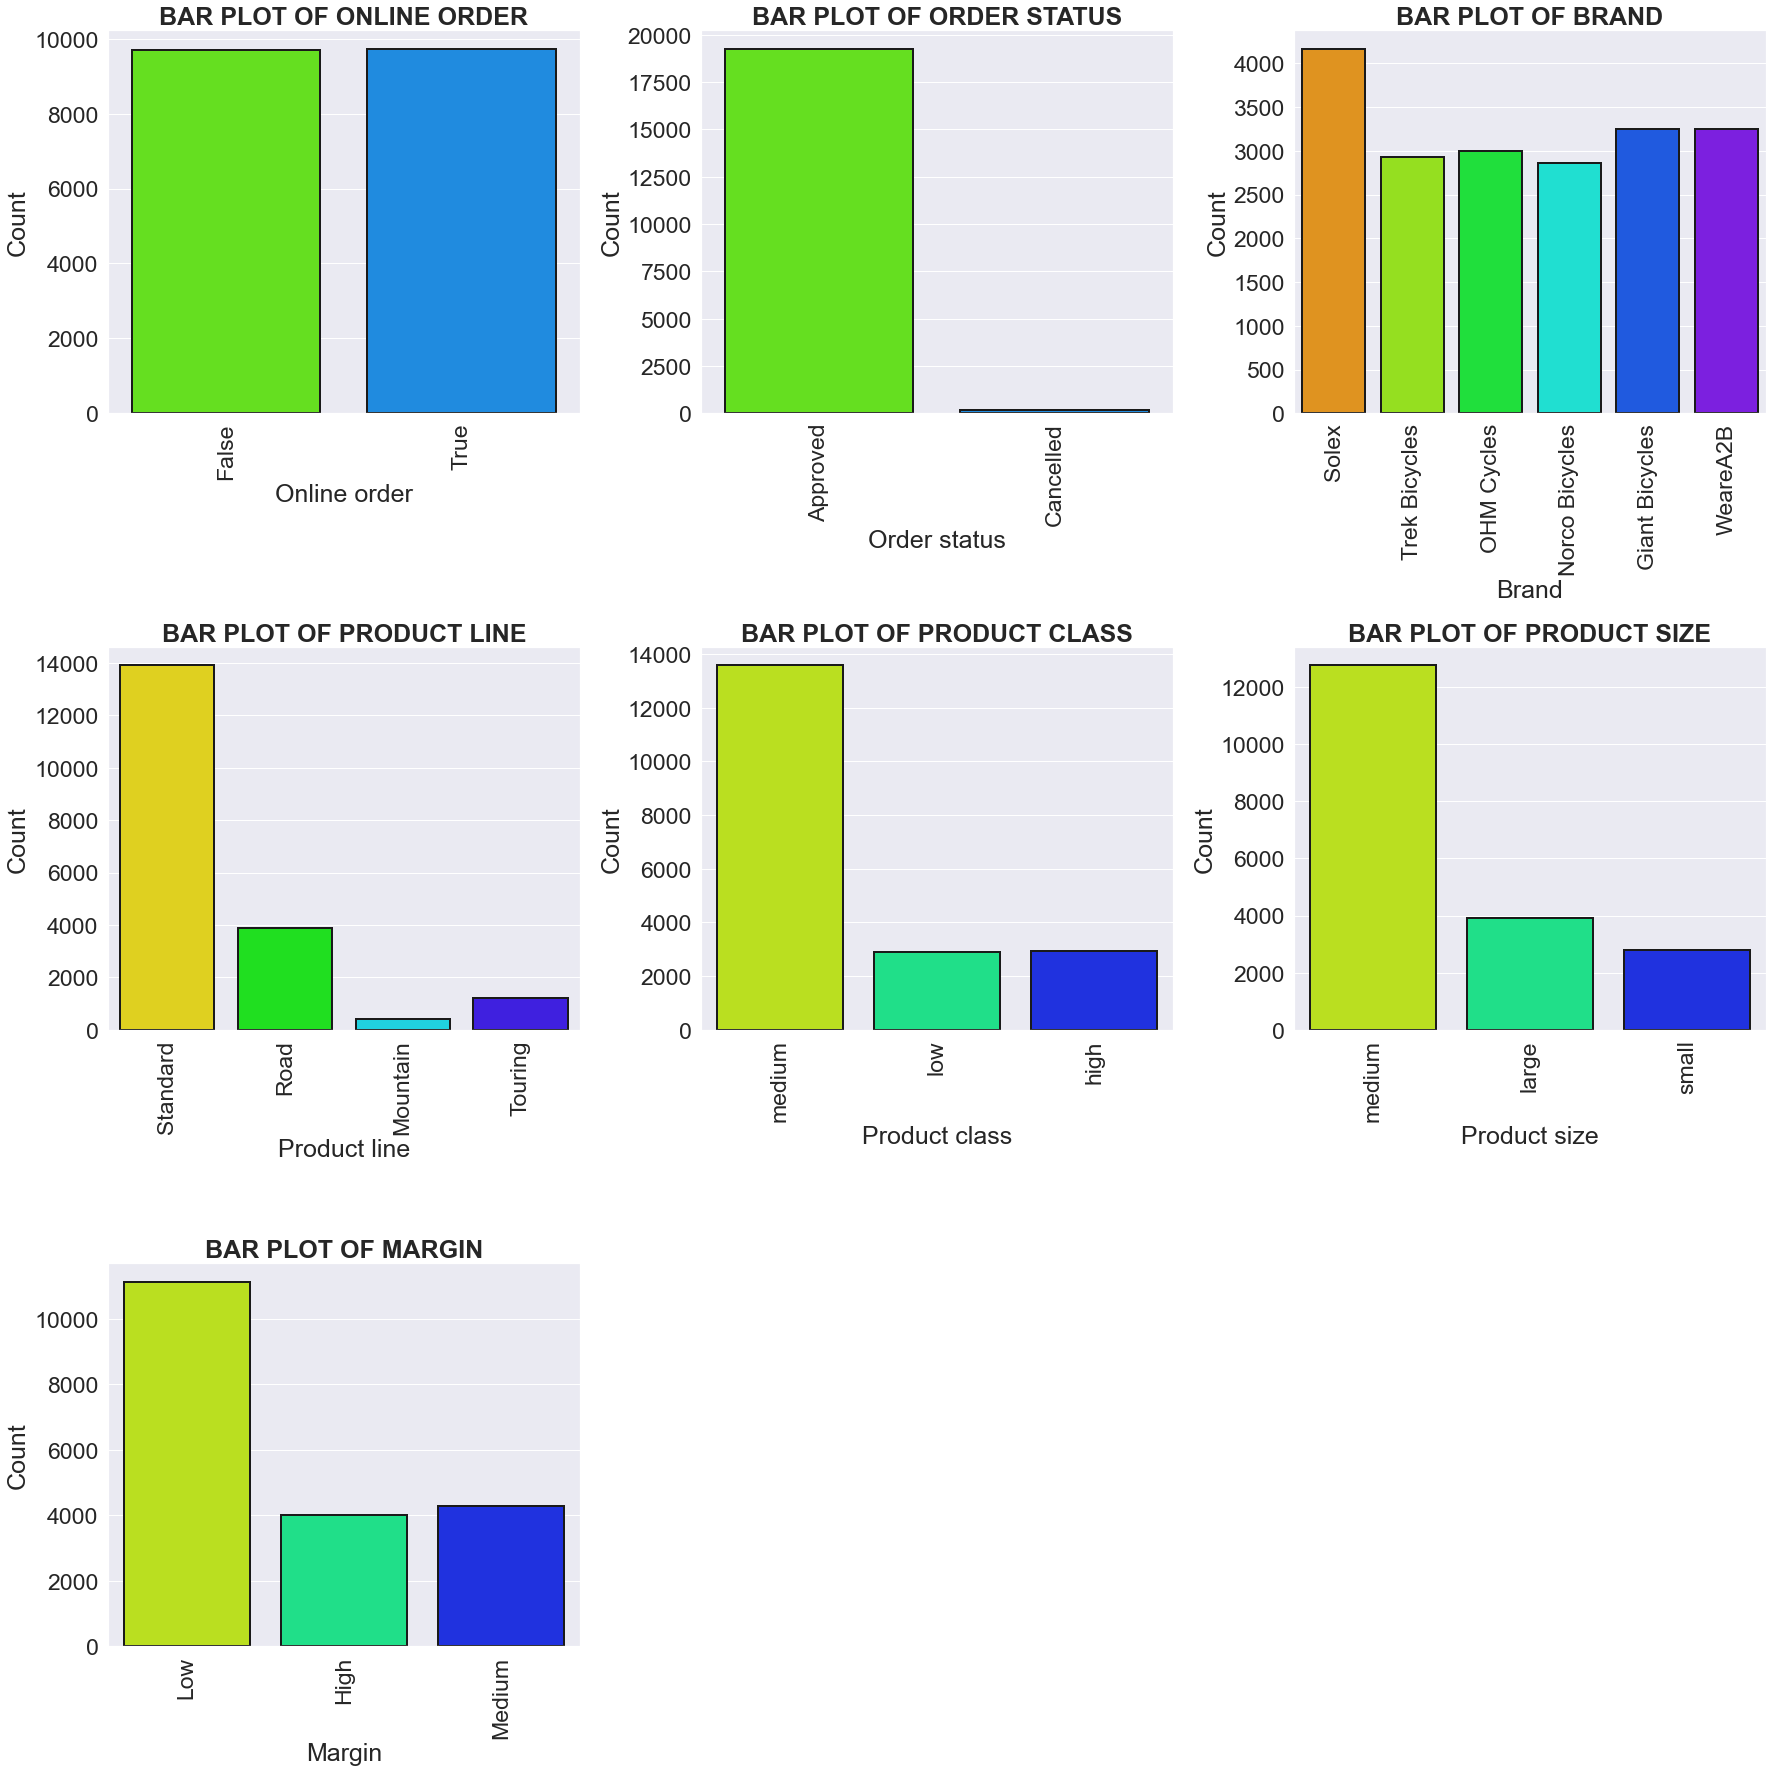

In [82]:
bar_plot(data['transactions'][trans_cat], data['transactions'][trans_cat].columns, 3, 3)

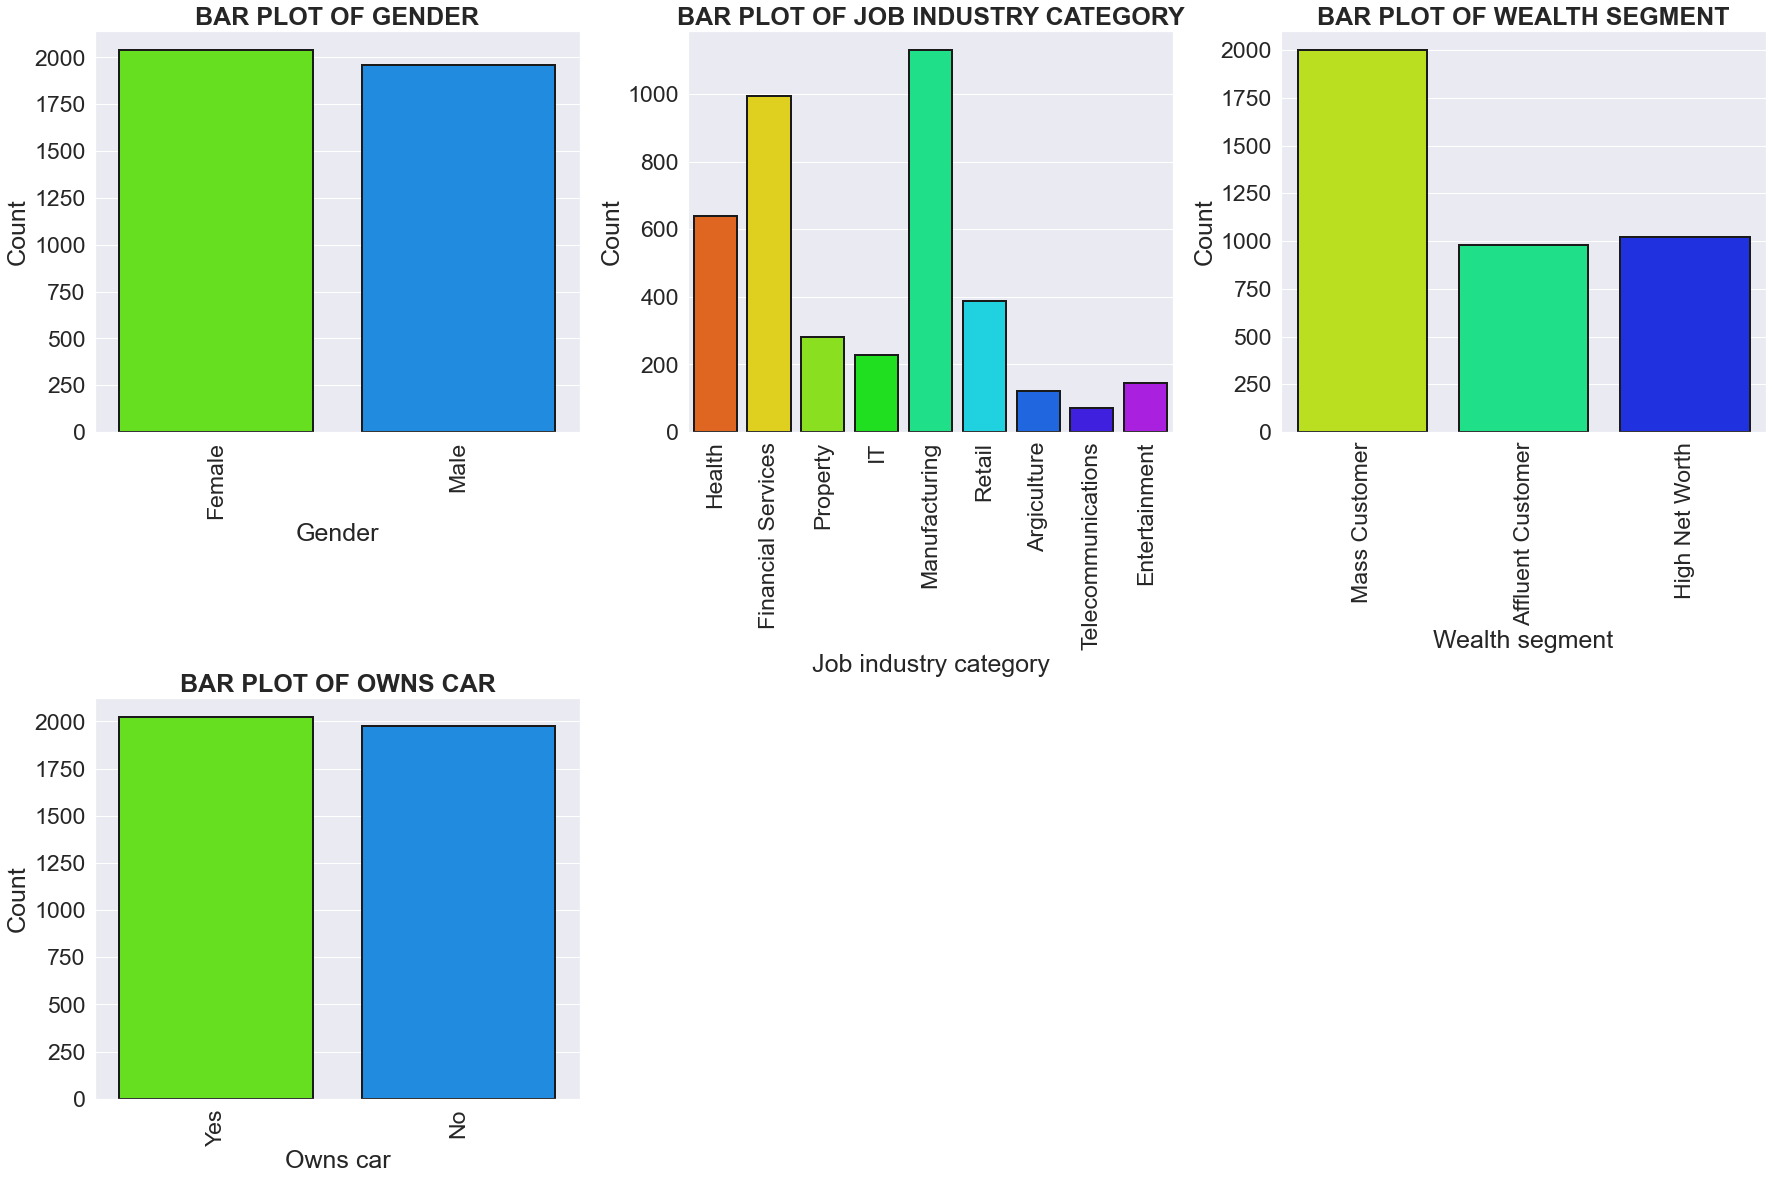

In [83]:
bar_plot(data['demographics'][demo_cat].drop(columns='job_title'), data['demographics'][demo_cat].drop(columns='job_title').columns, 3, 3)

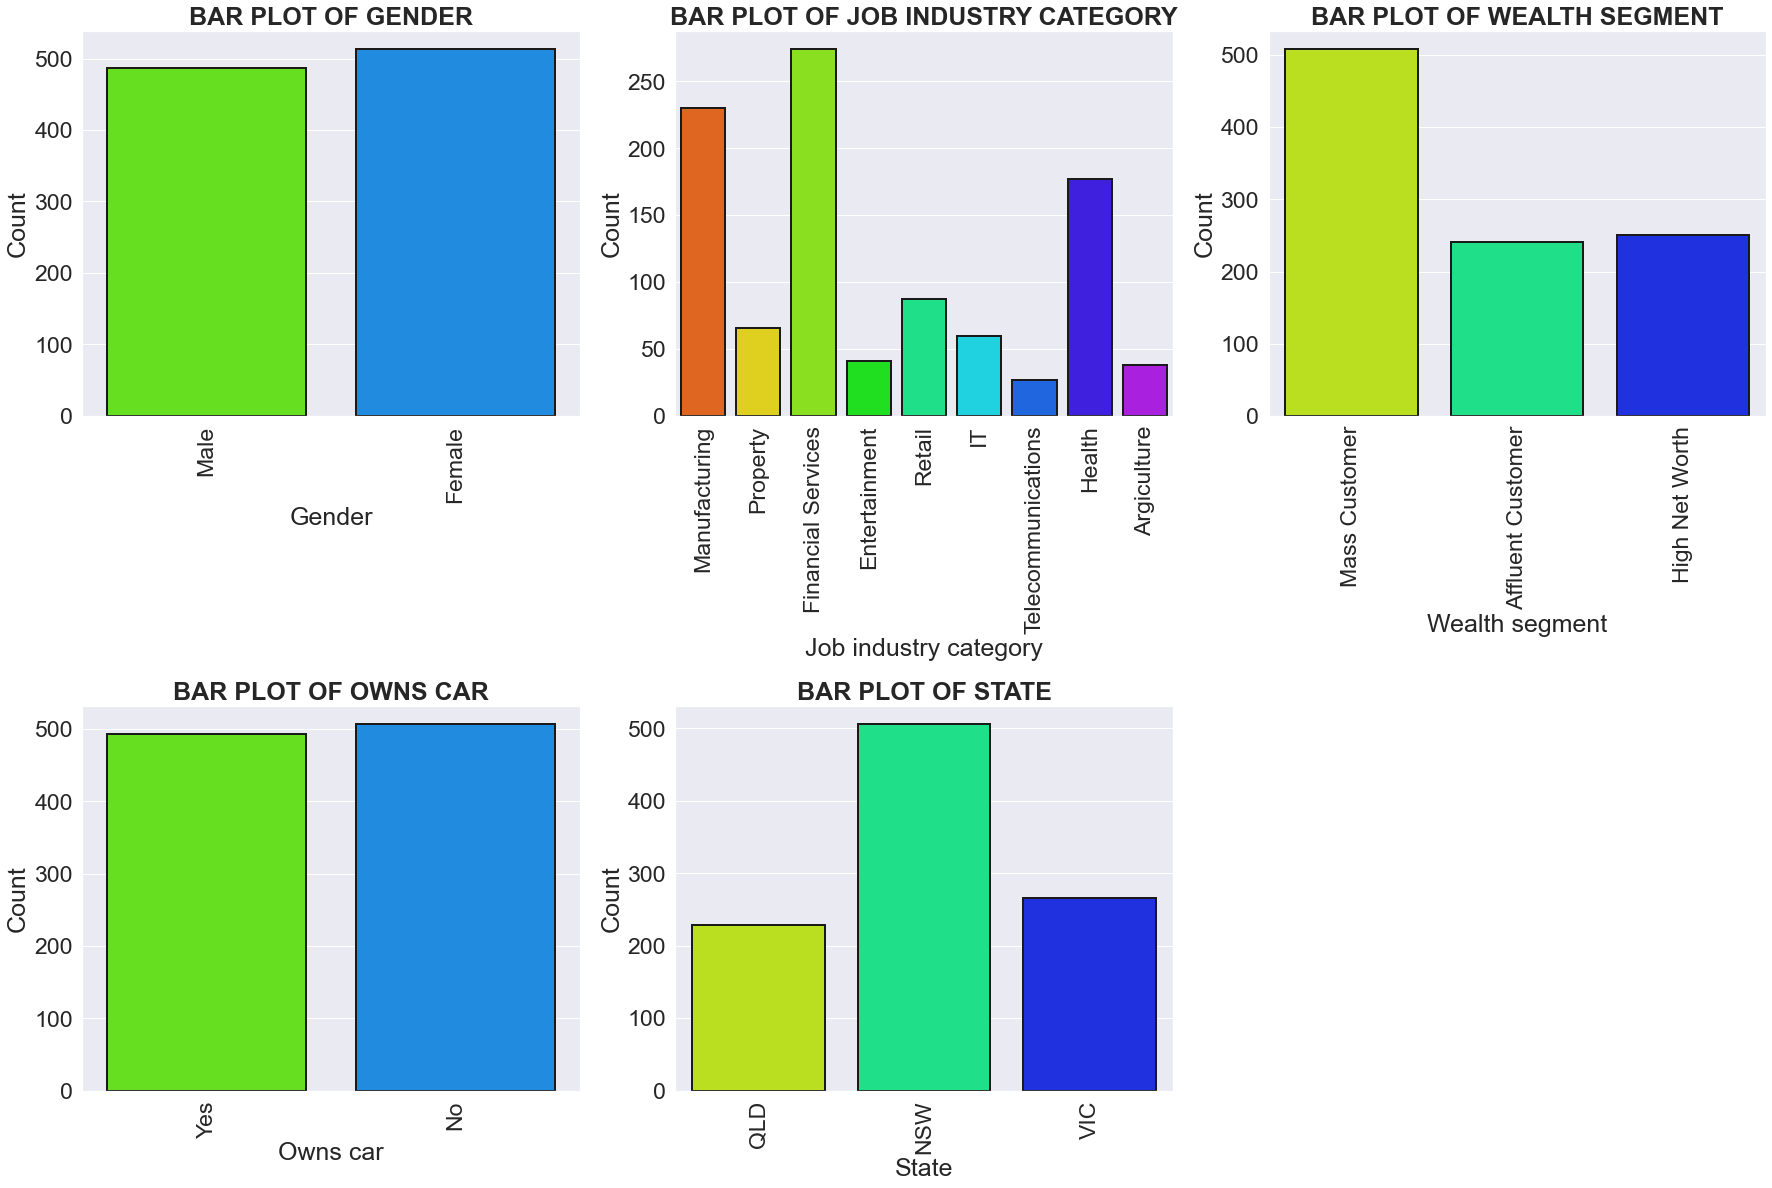

In [84]:
bar_plot(data['customerslist'][cust_cat].drop(columns='job_title'), data['customerslist'][cust_cat].drop(columns='job_title').columns, 3, 3)

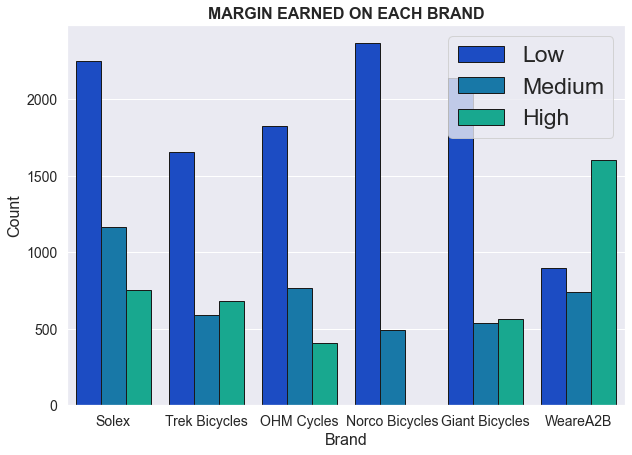

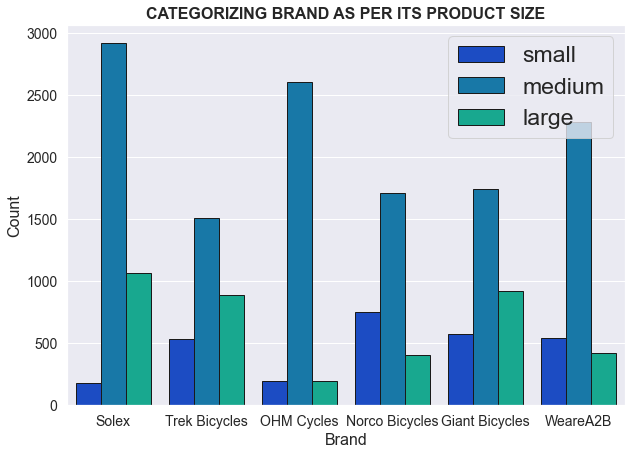

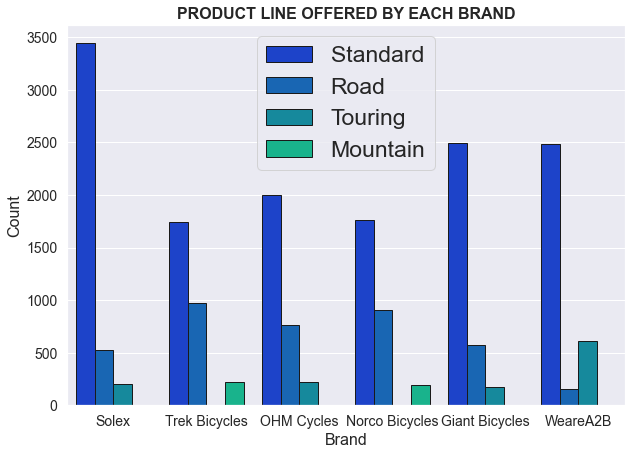

In [85]:
def Stackedcolumnplot(df_cat, x_col, hue_col, title, order=None):
    
    plt.figure(figsize=(10,7))
    ax = sns.countplot(data=df_cat, x=x_col, hue=hue_col, hue_order=order, edgecolor='k', palette='winter')
    ax.set_title(title.upper(), fontsize=16, fontweight='bold')
    ax.set_xlabel('Brand', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.legend(fontsize='large')
    plt.show()
    
# Calling 'Stackedcolumnplot' function
Stackedcolumnplot(data['transactions'][trans_cat], 'brand', 'margin', 'Margin Earned On Each Brand', ['Low', 'Medium', 'High'])
Stackedcolumnplot(data['transactions'][trans_cat], 'brand', 'product_size', 'Categorizing Brand As Per Its Product Size', ['small', 'medium', 'large'])
Stackedcolumnplot(data['transactions'][trans_cat], 'brand', 'product_line', 'Product Line Offered By Each Brand', ['Standard', 'Road', 'Touring', 'Mountain'])

# Quantitative Analysis

In [86]:
# Quantitative features in the dataset

def continuous(df_name):
    
    # Initialize a list to store continuous features
    cont_features = []
    
    for col in data[df_name]:
        
        # int/float type features or numerical features with unique values more than 10
        if len(data[df_name][col].unique()) > 10 and data[df_name].dtypes[col] in ['int64', 'float64']:
            cont_features.append(col)
            
    return cont_features

# Creating separate lists for categorical variables
# It is important to remove unnecessary features from the lists

trans_cont = [col for col in continuous('transactions') if col not in Feature_skip]
demo_cont = [col for col in continuous('demographics') if col not in Feature_skip]
cust_cont = [col for col in continuous('customerslist') if col not in Feature_skip]
add_cont = [col for col in continuous('address') if col not in Feature_skip]

# Datetime Plot

In [87]:
# Plotting total monthly sales 
#data['transactions']['transaction_date'] = data['transactions']['transaction_date'].dt.strftime('%Y-%m')
df_date = data['transactions'][['transaction_date', 'list_price']]

def dateplot(dataframe, online):
    
    dataframe.groupby('transaction_date').agg(['sum']).plot(figsize=(16, 6), c='darkblue', marker='o', linewidth=1)
    plt.title('Total %s sales for each day in 2017' %online, fontsize=15, fontweight='bold')
    plt.xlabel('Day of transaction', fontsize=15)
    
    if online=='offline and online':
        plt.ylabel('Total daily sales (in $)', fontsize=15)
    else:
        plt.ylabel('Total daily sales (in $)', fontsize=15)
    plt.tick_params(labelsize=13)
    plt.legend(['Total daily sales'], fontsize='medium')
    plt.show()

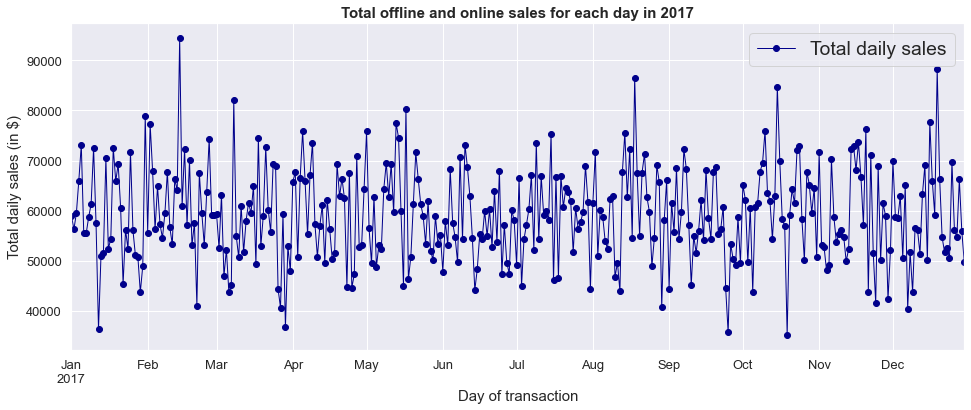

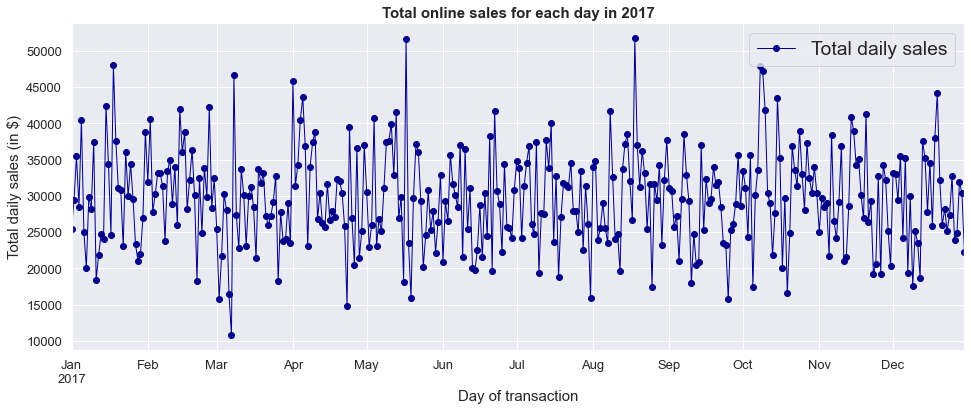

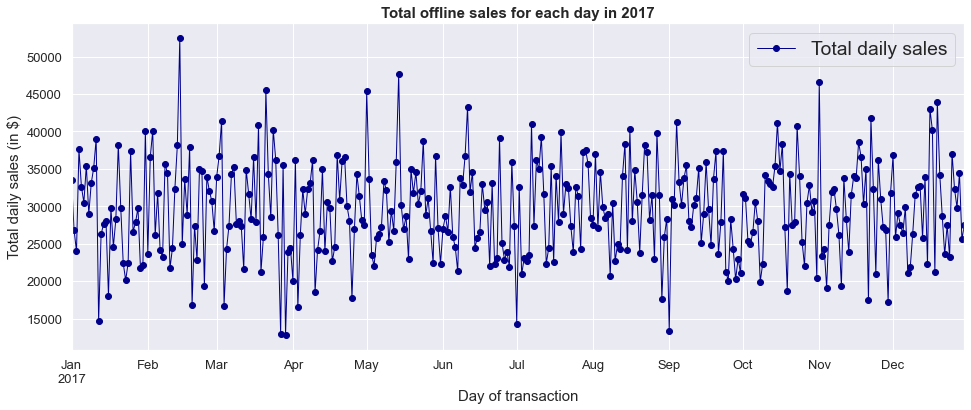

In [88]:
# Online vs Offline sales
dateplot(df_date, 'offline and online')
dateplot(df_date[data['transactions']['online_order']==True], 'online')
dateplot(df_date[data['transactions']['online_order']==False], 'offline')

# Segregation of Age Groups 

In [89]:
data_trans_demo = pd.merge(data['demographics'], data['transactions'], how = 'inner', on = 'customer_id')
Data = pd.merge(data_trans_demo, data['address'], how = 'inner', on = 'customer_id')

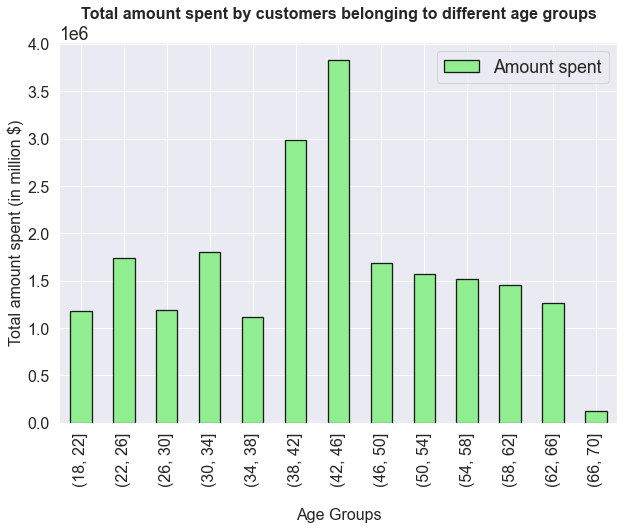

In [90]:
Data['age_group'] = pd.cut(Data['Age'], bins = np.arange(18, 71, 4), precision=0)
Data.groupby(['age_group']).agg(amount_spent = ('list_price', np.sum)).sort_values(by='age_group').plot.bar(figsize=(10,7), color='lightgreen', edgecolor='k', fontsize=16, lw=1.3)
plt.title("Total amount spent by customers belonging to different age groups\n", fontweight = 'bold', fontsize=16)
plt.xlabel('\nAge Groups', fontsize=16)
plt.ylabel('Total amount spent (in million $)', fontsize=16)
plt.legend(['Amount spent'])
plt.show()

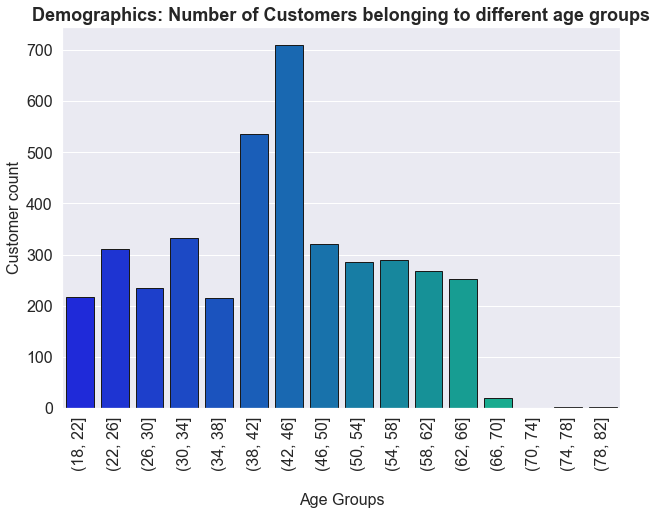

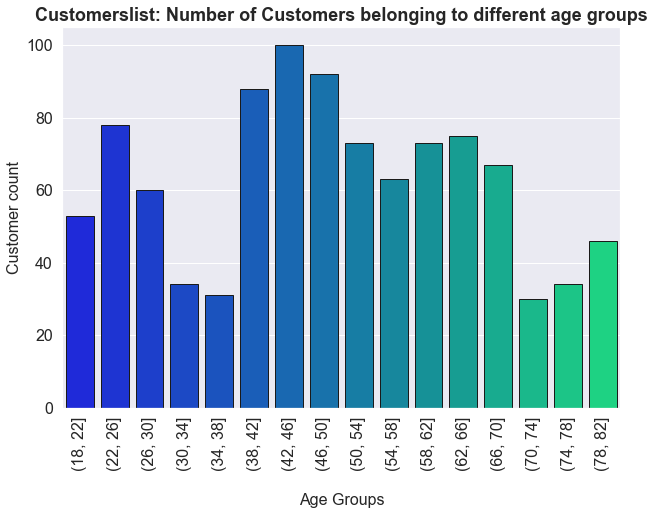

In [91]:
def age_group(age_var, df_name):
    
    plt.figure(figsize=(10,7))
    sns.countplot(pd.cut(age_var, bins=np.arange(18, 85, 4), precision=0), palette='winter', edgecolor='k')
    plt.title(df_name +': Number of Customers belonging to different age groups', fontsize=18, fontweight='bold')
    plt.xlabel('\nAge Groups', fontsize=16)
    plt.ylabel('Customer count', fontsize=16)
    plt.tick_params(labelsize=16)
    plt.xticks(rotation=90)
    plt.show()
    
age_group(data['demographics']['Age'], 'Demographics')
age_group(data['customerslist']['Age'], 'Customerslist')

# Gaussian Distribution

In [92]:
# Plotting Histogram and Normal distribution

def distribution(df, features, row, col, change_size=None):
    
    fig = plt.figure(figsize=(20, 20))
    
    for index, feature in enumerate(features):
        
        if change_size == True:
            sns.set(font_scale=1.1)
        else:
            sns.set(font_scale=1.6)
        ax = fig.add_subplot(row, col, index+1)
        sns.distplot(df[feature], ax=ax)
        ax.set_title('Distribution of %s' %re.sub('_', ' ', feature).capitalize(), fontweight='bold')
        ax.set_xlabel(re.sub('_', ' ', feature).capitalize())
    
    plt.tight_layout()
    plt.show()

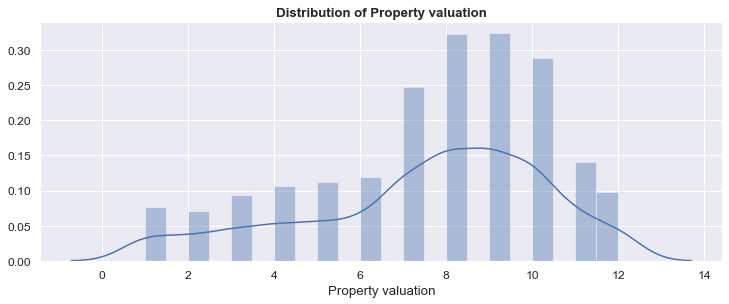

In [93]:
distribution(data['address'][add_cont], data['address'][add_cont].columns, 5, 2, True)

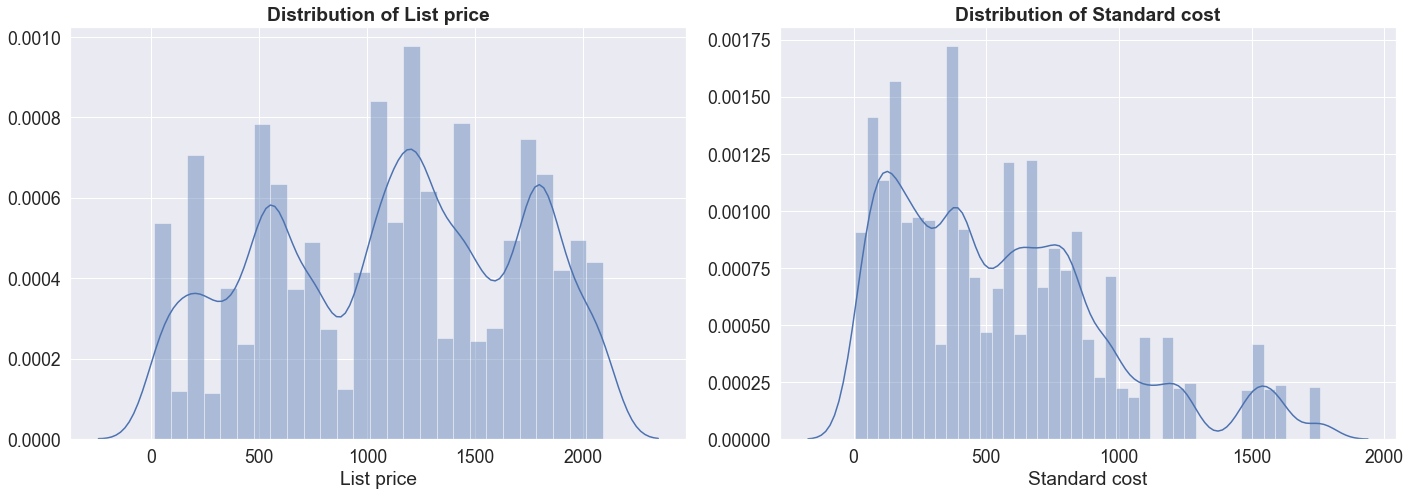

In [94]:
distribution(data['transactions'][trans_cont], data['transactions'][trans_cont].columns, 3, 2)

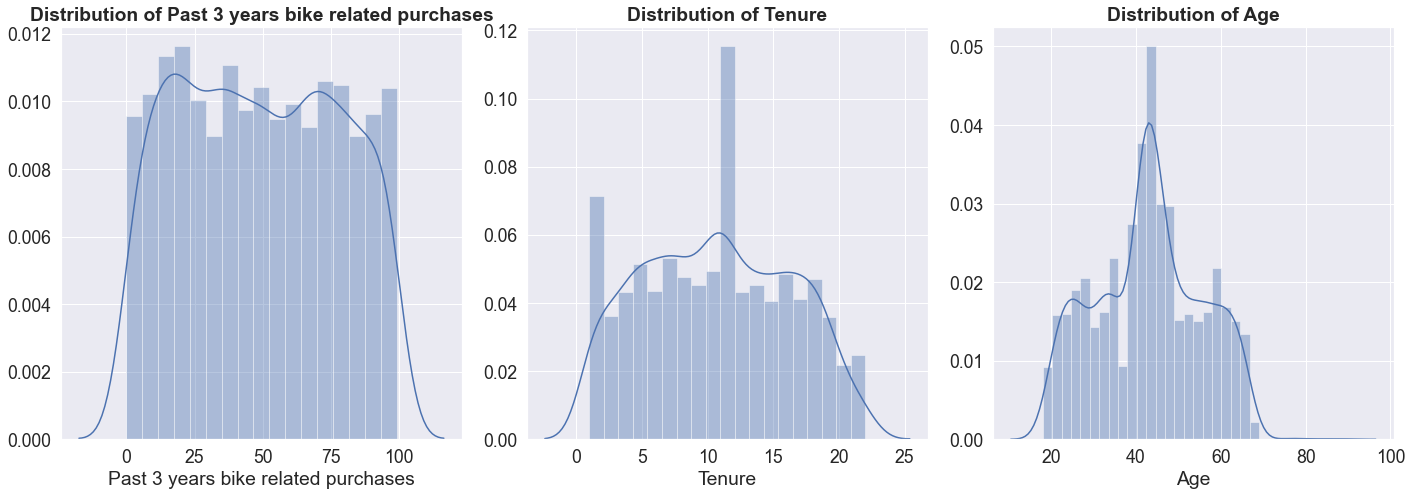

In [95]:
distribution(data['demographics'][demo_cont], data['demographics'][demo_cont].columns, 3, 3)

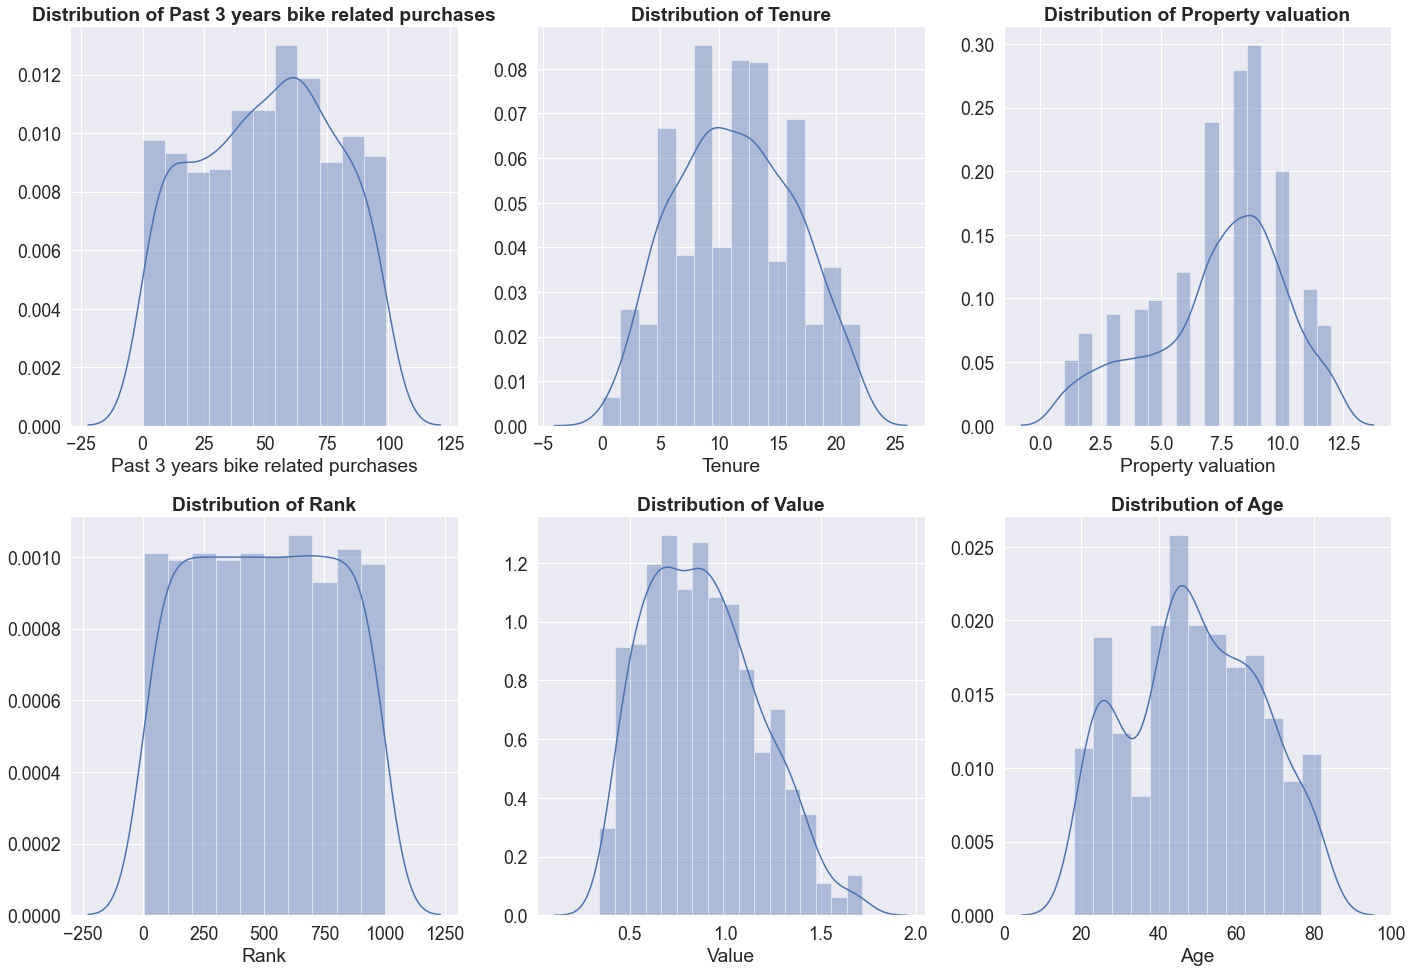

In [96]:
distribution(data['customerslist'][cust_cont], data['customerslist'][cust_cont].columns, 3, 3)

# Total sales made by each brand

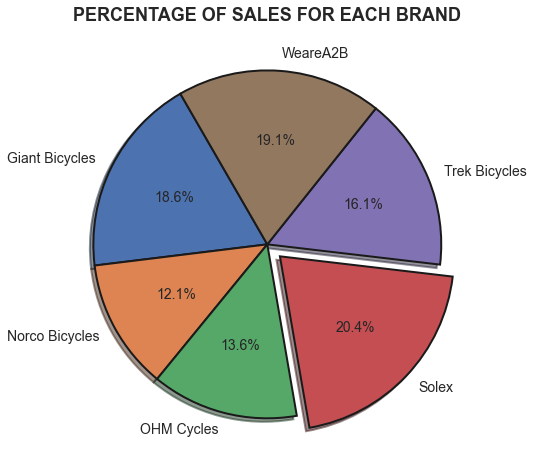

,list_price
,sum
brand,
Giant Bicycles,4007214.41
Norco Bicycles,2613964.32
OHM Cycles,2935012.34
Solex,4398545.70
Trek Bicycles,3474769.01
WeareA2B,4102665.94


In [97]:
plt.figure(figsize=(12, 8))
total_sum = data['transactions'][['brand', 'list_price']].groupby(['brand']).agg(['sum'])
labels = sorted(data['transactions']['brand'].unique())
sizes = total_sum.values.flatten()
wedgeprops={'edgecolor':'k', 
            'linewidth': 2, 
            'antialiased': True}
plt.pie(sizes, labels=labels, explode=[0,0,0,0.1,0,0], autopct='%1.1f%%', shadow=True, startangle=120, wedgeprops=wedgeprops, textprops={'fontsize':14})
plt.title('Percentage of sales for each brand'.upper(), fontsize=18, fontweight='bold')
plt.show()

# Aggregated result
total_sum

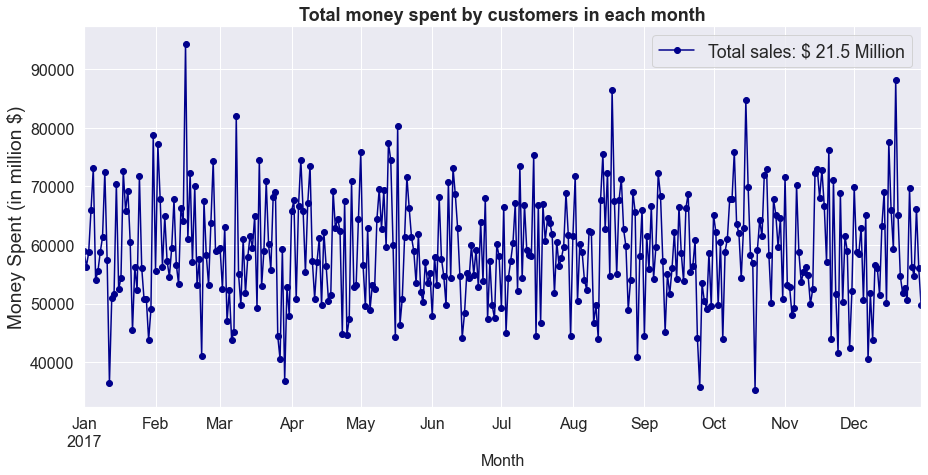

In [98]:
Data.groupby(['transaction_date']).agg(total_mon_spent = ('list_price', np.sum)).plot(figsize=(15,7), marker='o', color = 'darkblue')
plt.title('Total money spent by customers in each month', fontweight = 'bold', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Money Spent (in million $)')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(['Total sales: $ %.1f Million' % (np.sum(Data['list_price'])/1000000)])
plt.show()

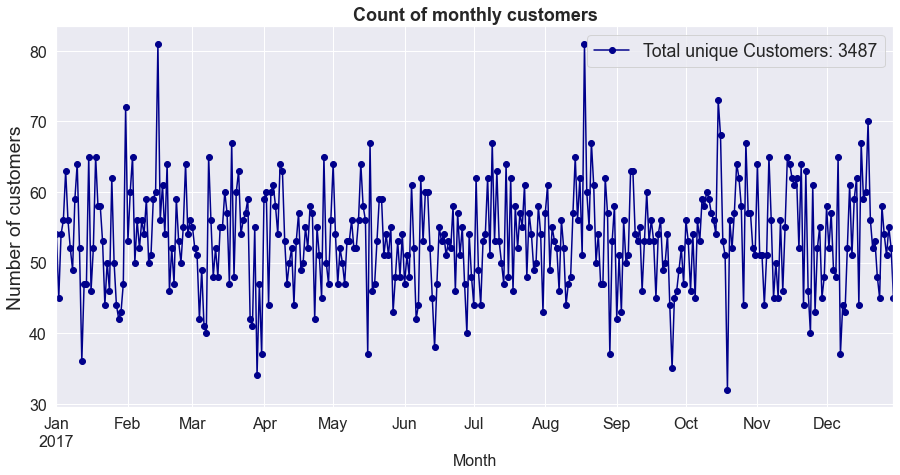

In [99]:
Data.groupby(['transaction_date']).agg(Total_customers = ('customer_id', 'count')).plot(figsize=(15,7), marker='o', color = 'darkblue')
plt.title('Count of monthly customers', fontweight = 'bold', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of customers')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(['Total unique Customers: %d' % len(Data['customer_id'].unique())])
plt.show()

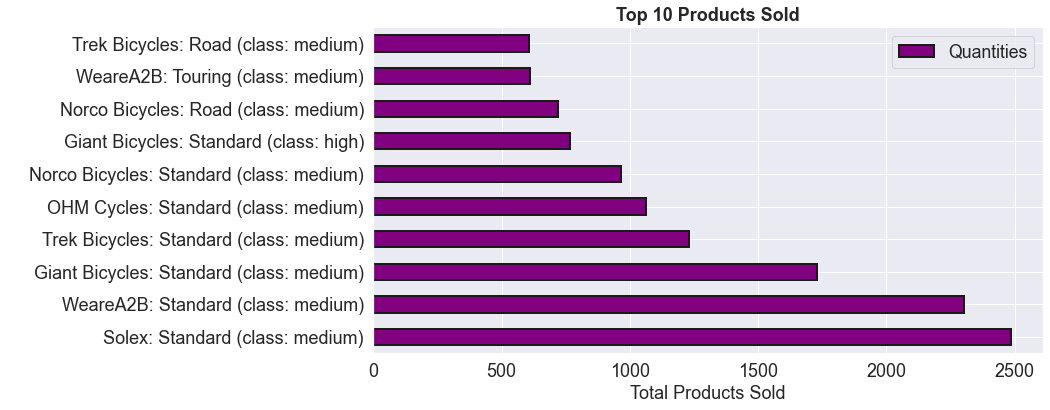

In [100]:
def brand_class_line(features):
    
    pro_brand = features[0]
    pro_line = features[1]
    pro_class = features[2]
    
    brline  = ": ".join([pro_brand, pro_line])
    brline_class = " ".join([brline, '(class: %s)' %pro_class])
    
    return brline_class

Data['product_type'] = Data[['brand', 'product_line', 'product_class']].apply(brand_class_line, axis = 1)

top10_products = Data.groupby(['product_type']).agg(Total_sold = ('product_type', 'count')).sort_values(by = 'Total_sold', ascending = False).head(10)
top10_products.plot.barh(figsize=(12, 6), color='purple', edgecolor = 'k', lw=2)
plt.title('Top 10 Products Sold', fontweight = 'bold', fontsize = 18)
plt.xlabel('Total Products Sold', fontsize = 18)
plt.ylabel(' ')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Quantities'])
plt.show()

# IV. Insights from graphical analysis for future business strategies

* "Solex" is the most preferred brand with more than 20% customers buying its product. 


* Order once booked has less than 1% chance of getting cancelled implying high success rate.


* Majority of the customers work in the "Health", "Financial Services" and "Manufacturing" industry.


* About 50% of the customers belong to the state of "New South Wales".


* Products from "WearA2B" have the highest margin and products from "Norco Bicycles" have the lowest margin on every sale.


* Customers are more likely to buy "medium" sized product and less likely to buy a "small" sized product.


* "Standard" variant across all the brands is the most popular and "Mountain" is the least popular among customers.


* For online orders, the highest "one day sale" was in May and then again in August whereas lowest "one day sale" came in March. For offine orders, the highest "one day sale" was in February whereas lowest "one day sale" came in March and September.


* Combined "one day sale" via online and offline mode is recorded highest in February and lowest in October.


* Count of customers between the age groups 40-50 is the highest and customers between this age interval can be targeted.


* Continuous variables for these datasets are highly skewed which indicates outliers and also majority of features don't follow a gaussian distribution.


* Solex, WeareA2B and Giant Bicycles made over 120 Million dollars combined in sales with each brand bringing more than 40 Million dollars individually and contributed to about 60% of the total sales.    

> This is a bonafide work of Aarush Gandhi. 

In [101]:
Data.to_csv(r'C:\Users\Dell\Desktop\Data.csv', index=False)